# Introduction to Derivatives and Integrals 
### (a numerical approach) ###

<a target="_blank" href="https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Lecture_Notes/Coding/derivatives_and_integrals.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Let's load the basic libraries that we will use.

In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

1. **Numpy** ([paper](https://www.nature.com/articles/s41586-020-2649-2.pdf))is by far one of the most amazing tools in scientific computations. Numpy is the foundation for many Python libraries. 
2. **Matplotlib** ([paper](https://ieeexplore.ieee.org/document/4160265)) is used extensively for plotting. [Tutorials](https://matplotlib.org/stable/tutorials/index.html)

## Derivatives ##

Last week we cover in class the definition of the derivative of a function,

$$
f'(x) = \frac{d f(x)}{dx} = \frac{d y}{dx} = \displaystyle \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$


1.  Define a function in Python,
$$
f(x) = 10 + \left(\frac{x}{10}\right)^3e^{(\frac{x}{10})^2}
$$

In [16]:
# in Python.

# def f(x):
    # code here
    #return y
    
def f(x):
    x = x/10
    return np.exp(x**2)*x**3 + 10

2. Plot the function using Matplotlib

In [17]:
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
x = np.linspace(-10, 10, 100)

# evaluate our function
y = f(x)

print('what is x?: ', type(x))
print('what is f?: ', type(f))
print('what is y?: ', type(y))

what is x?:  <class 'numpy.ndarray'>
what is f?:  <class 'function'>
what is y?:  <class 'numpy.ndarray'>


Text(0.5, 0, 'x')

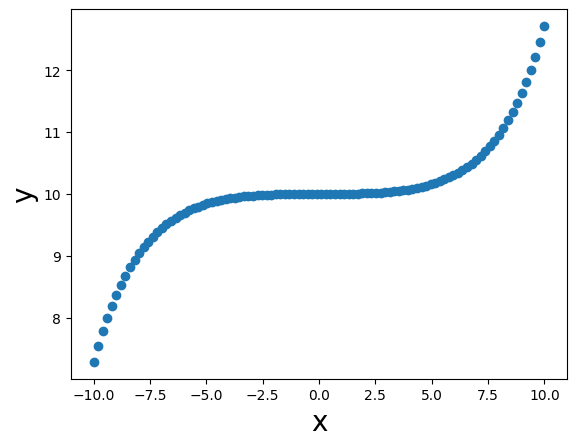

In [18]:
# let's plot the function f(x)
# exercise
# what is the difference between plt.plot(x,y) and plt.scatter(x,y)


plt.scatter(x,y)
plt.ylabel('y',fontsize=20)
plt.xlabel('x', fontsize=20)

Instead of using the general definition of "derivative", let's use the **two-point formula**  to compute the derivative of a function, 
$$
\frac{d f(x)}{dx} \approx \frac{f(x + h) - f(x - h)}{2h}
$$

In [19]:
def df_dx(x,h):
    x_p_h = x + h
    x_m_h = x - h
    y1 = f(x_p_h)
    y2 = f(x_m_h)
    y = y1 - y2
    return y/(2*h)
    

What is the derivative of $f(x)$?
$$
\frac{d f(x)}{dx} = \left (\frac{3x^2}{1000} + \frac{x^4}{50} \right )e^{(\frac{x}{10})^2}
$$

Using python define a function that represent the **true** derivative of $f(x)$. <br>
For this we may need these extra operations in Python,
1. power function:  <br> `x**2` or `np.power(x,2)`
2. exponential function: <br> `np.exp(x)`

In [20]:
def df_dx_true(x):
    x2 = np.power(x,2)
    x4 = np.power(x,4)
    print(type(x))
    e = np.exp(x2/100)
    y = 3*x2/(10**3) + x4/50000
    y = y*e
    return y

3. Let's compare the true derivative vs the numerically one using the two-point formula.<br>
   Let's use a h = 0.1

<class 'numpy.ndarray'>


Text(0.5, 0, 'x')

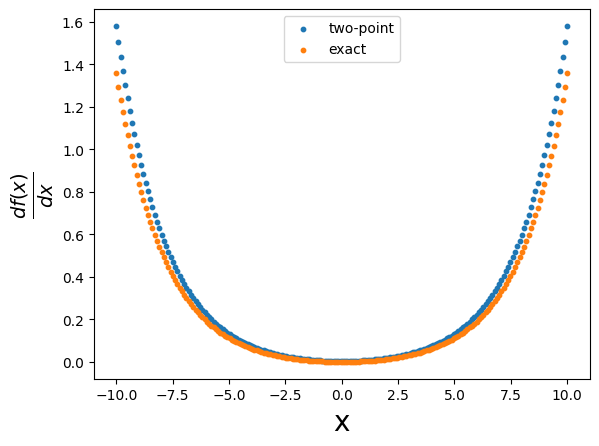

In [21]:
x = np.linspace(-10,10,200)
h = 2. 
df_num = df_dx(x,h)

df_true = df_dx_true(x)

plt.scatter(x,df_num, s=10, label = 'two-point')
plt.scatter(x, df_true, s=10, label='exact')
plt.legend()


plt.ylabel(r'$\frac{df(x)}{dx}$', fontsize=20)
plt.xlabel('x', fontsize=20)

$\bullet$ What is the error in the numerical derivatives? 

Text(0.5, 0, 'x')

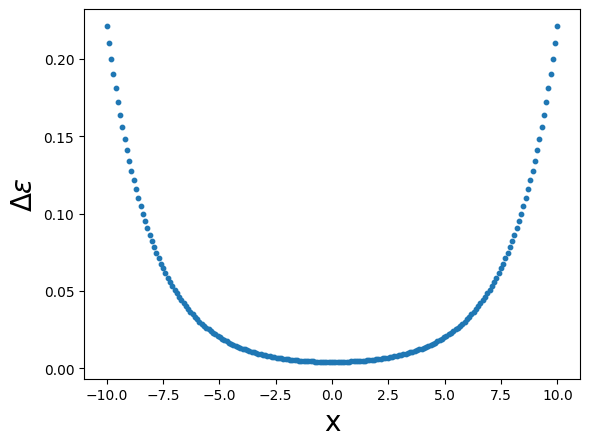

In [22]:
error = df_num - df_true
plt.scatter(x, error, s=10)

plt.ylabel(r'$\Delta\epsilon$', fontsize=20)
plt.xlabel('x', fontsize=20)

**Extra exercises** <br>
Try plotting the error for other values of h to see what will be the value to get a good approximation of derivative. 

## Integration ##
In this part of the tutorial, we will cover numerical integration. 
$$
\int_a^b f(x)dx = \displaystyle \lim_{h \to 0}  \sum_i^N f(\varepsilon_i) h
$$
where $h$ is the width of the *"rectangle"*.


The goal of this tutorial is to compute the integral of the function,
$$
f(x) = 10 + \left(\frac{x}{10}\right)^3e^{(\frac{x}{10})^2}
$$
in the interval -10 to 10. 

$$
\int_{-10}^{10}f(x) dx = \int_{-10}^{10} 10 + \left(\frac{x}{10}\right)^3e^{(\frac{x}{10})^2}dx = 200
$$

1. What is the value of $\int_{-10}^{10}f(x) dx$ ?  (try to solve this at home)

Text(0, 0.5, '$f(x)$')

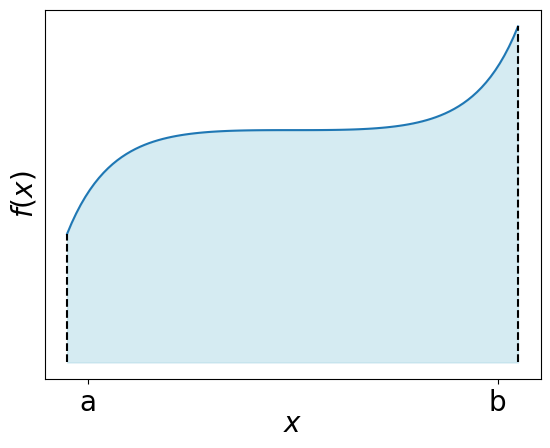

In [23]:
def f(x):
    x = x/10
    return (x**3)*np.exp(x**2) + 10

a = -11
b = 11

x = np.linspace(a, b, 100)
y = f(x)

plt.plot(x, y)
plt.fill_between(x, y, color='lightblue', alpha=0.5)
plt.vlines(a, 0, f(a), color='k', ls='--')
plt.vlines(b, 0, f(b), color='k', ls='--')

plt.xticks([-10, 10], ['a', 'b'], fontsize=20)
plt.xlabel(r'$x$', fontsize=20, labelpad=-5)
plt.yticks([])
plt.ylabel(r'$f(x)$', fontsize=20)


1. Compute the integral of $f(x)$ using a single "rectangle".

In [24]:
# formula for the area of a rectangle
# area = height*width
area = (f(b))*(b-a)
print('integral value is ', area)

integral value is  318.19673759594053


In [25]:
x = np.linspace(a, b, 3)
h = x[1] - x[0]
print(x)

area = 0
for xi in x[:-1]:
    xj = xi + h/2
    yj = f(xj)
    aj = yj*(h)
    area = area + aj
    
print(area)

[-11.   0.  11.]
220.0


area =  107.5234058974397
area =  112.4765941025603
-------------------
total area =  220.0
-------------------


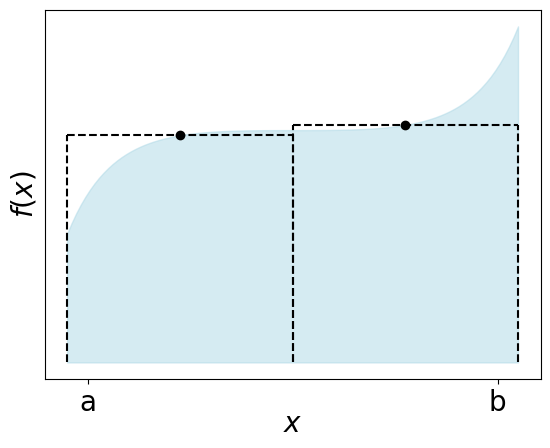

In [26]:
x = np.linspace(a, b, 100)
y = f(x)
plt.fill_between(x, y, color='lightblue', alpha=0.5)

x = np.linspace(a, b, 3)
h = x[1] - x[0]
area = 0
for xi in x[:-1]:
    xj = xi + h/2
    yj = f(xj)
    aj = yj*(h)
    print('area = ', aj)
    plt.scatter(xj, yj, color='k')
    plt.vlines(xi, 0, f(xj), color='k', ls='--')
    plt.vlines(xi + h, 0, f(xj), color='k', ls='--')
    plt.hlines(f(xj), xi, xi+h, color='k', ls='--')
    area += aj
plt.xticks([-10, 10], ['a', 'b'], fontsize=20)
plt.xlabel(r'$x$', fontsize=20, labelpad=-5)
plt.yticks([])
plt.ylabel(r'$f(x)$', fontsize=20)
    
print('-------------------')
print('total area = ', area) 
print('-------------------')


Let's try
$$
f(x) = \cos(5x)^2+x^2
$$

$$
\int_{-1}^{1} \cos(5x)^2+x^2 dx \approx 1.6123
$$

Text(0, 0.5, '$f(x)$')

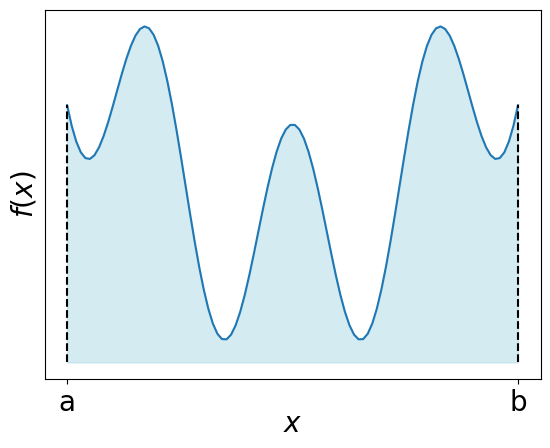

In [27]:
def f(x):
    return np.cos(5*x)**2 + x**2

a = -1
b = 1

x = np.linspace(a, b, 100)
y = f(x)

plt.plot(x, y)
plt.fill_between(x, y, color='lightblue', alpha=0.5)
plt.vlines(a, 0, f(a), color='k', ls='--')
plt.vlines(b, 0, f(b), color='k', ls='--')

plt.xticks([-1, 1], ['a', 'b'], fontsize=20)
plt.xlabel(r'$x$', fontsize=20, labelpad=-5)
plt.yticks([])
plt.ylabel(r'$f(x)$', fontsize=20)


area =  0.6179088294587565
area =  0.08096409611326658
area =  0.08096409611326658
area =  0.6179088294587565
-------------------
total area =  1.3977458511440461
-------------------


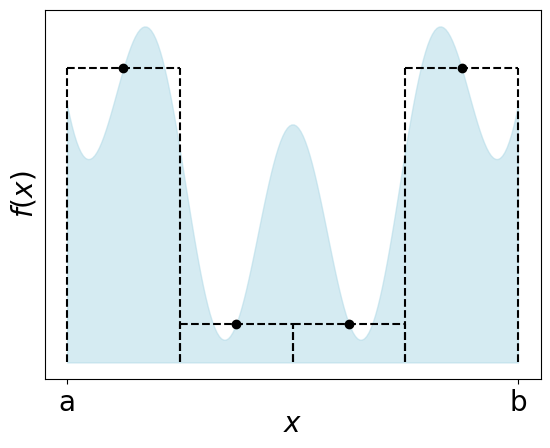

In [28]:
x = np.linspace(a, b, 200)
y = f(x)
plt.fill_between(x, y, color='lightblue', alpha=0.5)

x = np.linspace(a, b, 5)
h = x[1] - x[0]
area = 0
for xi in x[:-1]:
    xj = xi + h/2
    yj = f(xj)
    aj = yj*(h)
    print('area = ', aj)
    plt.scatter(xj, yj, color='k')
    plt.vlines(xi, 0, f(xj), color='k', ls='--')
    plt.vlines(xi + h, 0, f(xj), color='k', ls='--')
    plt.hlines(f(xj), xi, xi+h, color='k', ls='--')
    area += aj
plt.xticks([-1, 1], ['a', 'b'], fontsize=20)
plt.xlabel(r'$x$', fontsize=20, labelpad=-5)
plt.yticks([])
plt.ylabel(r'$f(x)$', fontsize=20)

print('-------------------')
print('total area = ', area)
print('-------------------')